In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [378]:
# train and test data
train_data=pd.read_csv(r'C:\Users\User\Desktop\ms\project amz\train.csv')
test_data=pd.read_csv(r'C:\Users\User\Desktop\ms\project amz\test.csv')

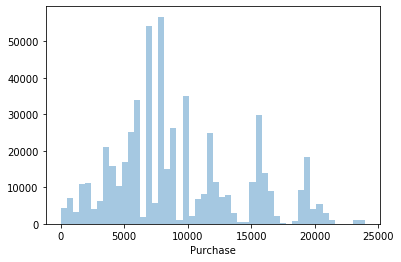

In [167]:
# visulization of target distribution
sns.distplot(train_data['Purchase'],kde=False)

In [261]:
# user id prepocess
train_data['User_ID'] = train_data['User_ID'] - 1000000
test_data['User_ID'] = test_data['User_ID'] - 1000000

In [262]:
# split str and number from product_ID

result = train_data['Product_ID'].str.extract('([a-zA-Z]+)([^a-zA-Z]+)', expand=True)
result.columns = ['pr_Text', 'pr_Number']

train_data['Prid_no']=pd.to_numeric(result['pr_Number'])


# split str and number from product_ID in test data

result1 = test_data['Product_ID'].str.extract('([a-zA-Z]+)([^a-zA-Z]+)', expand=True)
result1.columns = ['pr_Text1', 'pr_Number1']

test_data['Prid_no']=pd.to_numeric(result1['pr_Number1'])

In [264]:
# cheak mean() Purchase accoding to gender

train_data.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [265]:
# change str in numerical value

train_data['Gender']=train_data['Gender'].replace(['F','M'],[1,2])

test_data['Gender']=test_data['Gender'].replace(['F','M'],[1,2])

In [266]:
train_data.groupby('Age')['Purchase'].mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

In [267]:
# covert range into number accouding to importance
train_data['Age']=train_data['Age'].replace(['0-17','18-25','46-50','26-35','36-45','55+','51-55'],[1,2,3,4,5,6,7])

test_data['Age']=test_data['Age'].replace(['0-17','18-25','46-50','26-35','36-45','55+','51-55'],[1,2,3,4,5,6,7])

In [268]:
# covert range
#ax=sns.regplot(x="Age", y="Purchase", data=train_data,x_estimator=np.mean)

In [269]:
# relation b/w Occupation and purchase

Occupation_list=pd.DataFrame((list(train_data.groupby('Occupation')['Purchase'].mean())))

In [270]:
#ax=sns.regplot(x="Occupation", y="Purchase", data=train_data,x_estimator=np.mean)

In [271]:
Occupation_list=pd.DataFrame((train_data.groupby('Occupation')['Purchase'].mean()))

# set Occupation_list in ascending order
Occupation_ascending_list=list(Occupation_list.sort_values('Purchase',ascending=True).index)

#list of number in range 1 to 21

Occupation_set_list=list(range(1,22))

In [272]:
train_data['Occupation']=train_data['Occupation'].replace(Occupation_ascending_list,Occupation_set_list)

test_data['Occupation']=test_data['Occupation'].replace(Occupation_ascending_list,Occupation_set_list)

In [273]:
#ax=sns.regplot(x="Occupation", y="Purchase", data=train_data,x_estimator=np.mean)

In [274]:
# realtion bw city_Category vs purchase
train_data.groupby('City_Category')['Purchase'].mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

In [275]:
train_data['City_Category']=train_data['City_Category'].replace(['A','B','C'],[1,2,3])

test_data['City_Category']=test_data['City_Category'].replace(['A','B','C'],[1,2,3])

In [276]:
#relation bw Stay_In_Current_City_Years and purchase

train_data.groupby("Stay_In_Current_City_Years")['Purchase'].mean()

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64

In [277]:
train_data["Stay_In_Current_City_Years"]=train_data["Stay_In_Current_City_Years"].replace(['0','1','4+','3','2'],[1,2,3,4,5])

test_data["Stay_In_Current_City_Years"]=test_data["Stay_In_Current_City_Years"].replace(['0','1','4+','3','2'],[1,2,3,4,5])

In [278]:
train_data.groupby("Marital_Status")['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [279]:
#plt.subplot(121)
#sns.boxplot(x="Marital_Status",y='Purchase',data=train_data)

#plt.subplot(122)
#sns.violinplot(x="Marital_Status",y='Purchase',data=train_data)

In [280]:
# realtion between Product_Category_1 and purchase

In [281]:
train_data.groupby("Product_Category_1")['Purchase'].mean()

Product_Category_1
1     13606.218596
2     11251.935384
3     10096.705734
4      2329.659491
5      6240.088178
6     15838.478550
7     16365.689600
8      7498.958078
9     15537.375610
10    19675.570927
11     4685.268456
12     1350.859894
13      722.400613
14    13141.625739
15    14780.451828
16    14766.037037
17    10170.759516
18     2972.864320
19       37.041797
20      370.481176
Name: Purchase, dtype: float64

In [282]:
pcat1_list=pd.DataFrame(train_data.groupby('Product_Category_1')['Purchase'].mean())

# set pcat_list in ascending order
pcat1_ascending_list=list(pcat1_list.sort_values('Purchase',ascending=True).index)

#list of number in range 1 to 21

pcat1_set_list=list(range(1,21))

In [283]:
train_data['Product_Category_1']=train_data['Product_Category_1'].replace(pcat1_ascending_list,pcat1_set_list)

test_data['Product_Category_1']=test_data['Product_Category_1'].replace(pcat1_ascending_list,pcat1_set_list)

In [284]:
#sns.regplot(x='Product_Category_1',y='Purchase',data=train_data,x_estimator=np.mean)

In [285]:
# realtion between Product_Category_2 and purchase

In [286]:
# fill missing value with zero
train_data['Product_Category_2']=train_data['Product_Category_2'].fillna(0)

test_data['Product_Category_2']=test_data['Product_Category_2'].fillna(0)

In [287]:
train_data.groupby("Product_Category_2")['Purchase'].mean()

Product_Category_2
0.0      7518.695389
2.0     13619.356401
3.0     11235.359570
4.0     10215.192001
5.0      9027.821574
6.0     11503.551379
7.0      6884.683706
8.0     10273.259518
9.0      7277.006851
10.0    15648.729543
11.0     8940.580515
12.0     6975.472504
13.0     9683.352388
14.0     7105.264916
15.0    10357.077691
16.0    10295.681933
17.0     9421.576577
18.0     9352.440433
Name: Purchase, dtype: float64

In [288]:
pcat2_list=pd.DataFrame(train_data.groupby('Product_Category_2')['Purchase'].mean())

# set pcat_list in ascending order
pcat2_ascending_list=list(pcat2_list.sort_values('Purchase',ascending=True).index)

#list of number in range 1 to 18

pcat2_set_list=list(range(1,19))

In [289]:
train_data['Product_Category_2']=train_data['Product_Category_2'].replace(pcat2_ascending_list,pcat2_set_list)

test_data['Product_Category_2']=test_data['Product_Category_2'].replace(pcat2_ascending_list,pcat2_set_list)

In [290]:
#sns.regplot(x='Product_Category_2',y='Purchase',data=train_data,x_estimator=np.mean)

In [291]:
# realtion between Product_Category_3 and purchase

In [292]:
# fill missing value with zero
train_data['Product_Category_3']=train_data['Product_Category_3'].fillna(0)

test_data['Product_Category_3']=test_data['Product_Category_3'].fillna(0)

In [293]:
train_data.groupby("Product_Category_3")['Purchase'].mean()

Product_Category_3
0.0      8221.836943
3.0     13939.696574
4.0      9794.386667
5.0     12117.786889
6.0     13194.311043
8.0     13024.918882
9.0     10431.697210
10.0    13505.813441
11.0    12091.437673
12.0     8715.512762
13.0    13185.118703
14.0    10052.594530
15.0    12339.369900
16.0    11981.890642
17.0    11769.943001
18.0    10993.980773
Name: Purchase, dtype: float64

In [294]:
pcat3_list=pd.DataFrame(train_data.groupby('Product_Category_3')['Purchase'].mean())

# set pcat_list in ascending order
pcat3_ascending_list=list(pcat3_list.sort_values('Purchase',ascending=True).index)

#list of number in range 1 to 18

pcat3_set_list=list(range(1,17))

In [295]:
train_data['Product_Category_3']=train_data['Product_Category_3'].replace(pcat3_ascending_list,pcat3_set_list)

test_data['Product_Category_3']=test_data['Product_Category_3'].replace(pcat3_ascending_list,pcat3_set_list)

In [296]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Prid_no
0,1,P00069042,1,1,6,1,5,0,10,5.0,1.0,8370,69042
1,1,P00248942,1,1,6,1,5,0,14,16.0,4.0,15200,248942
2,1,P00087842,1,1,6,1,5,0,4,5.0,1.0,1422,87842
3,1,P00085442,1,1,6,1,5,0,4,3.0,1.0,1057,85442
4,2,P00285442,2,6,15,3,3,0,9,5.0,1.0,7969,285442


In [297]:
train_data_2=train_data.drop(columns=['Product_ID'])

test_data_2=test_data.drop(columns=['Product_ID'])

In [298]:
# feature and traget variable
y=train_data_2['Purchase']
x=train_data_2.drop(columns=['Purchase'])

In [329]:
# Scale numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x1=scaler.fit_transform(x)
test_data_3=scaler.fit_transform(test_data_2)

In [330]:
x1=pd.DataFrame(x1,columns=x.columns)
test_data_3 =pd.DataFrame(test_data_3,columns=test_data_2.columns)

In [331]:
def rmse(pred,Y):
    return mean_squared_error(pred,Y)**0.5

In [332]:
# train_test_splite
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2)

In [337]:
# base model of reg

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x1,y)

pred1=lr.predict(test_data_3)

print(rmse(pred1,y_test))

3068.0820569906145


In [338]:
# lasso model
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.1)
ls.fit(X_train,y_train)

pred2=ls.predict(X_test)

print(rmse(pred2,y_test))

3068.082039423765


In [370]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=800, max_depth=15, oob_score=True, n_jobs=6, random_state=123, min_samples_split=10, min_samples_leaf=10)
regr.fit(x1,y)

pred_rf=regr.predict(test_data_3)
#print(rmse(pred_rf,y_test))


In [371]:
pred_rf=pd.DataFrame(pred_rf,columns=["Purchase"])

In [372]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb.fit(x1,y)
pred=xgb.predict(test_data_3)
#print(rmse(pred,y_test))

In [373]:
pred_xg=pd.DataFrame(pred,columns=["Purchase"])

In [394]:
pred_s=.1*pred_rf+.9*pred_xg

In [395]:
final_data=pd.DataFrame(pd.concat([pred_s,test_data.iloc[:,:2]],axis=1))

In [396]:
final_data.to_csv(r'C:\Users\User\Downloads\file_sub.csv') 